# Linear binary multiclass classification of wines

Victor Kitov
[v.v.kitov@yandex.ru](v.v.kitov@yandex.ru)

In this task we will analize results of chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

In [21]:
%pylab inline
import sklearn
import sklearn as skl
import sklearn.datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
print(skl.__version__)  # should be >=0.23

0.23.2


In [3]:
X,Y = skl.datasets.load_wine(return_X_y=True, as_frame=True)

In [4]:
Z=X.copy()
Z['target']=Y

In [5]:
Z.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

In [28]:
Z.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,0


In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

### How many null values are in the features?

In [12]:
# Missing Values
print(X.isna().sum())

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64


In [8]:
X.count()
# there are no any null values in data

alcohol                         178
malic_acid                      178
ash                             178
alcalinity_of_ash               178
magnesium                       178
total_phenols                   178
flavanoids                      178
nonflavanoid_phenols            178
proanthocyanins                 178
color_intensity                 178
hue                             178
od280/od315_of_diluted_wines    178
proline                         178
dtype: int64

### Plot classes distribution

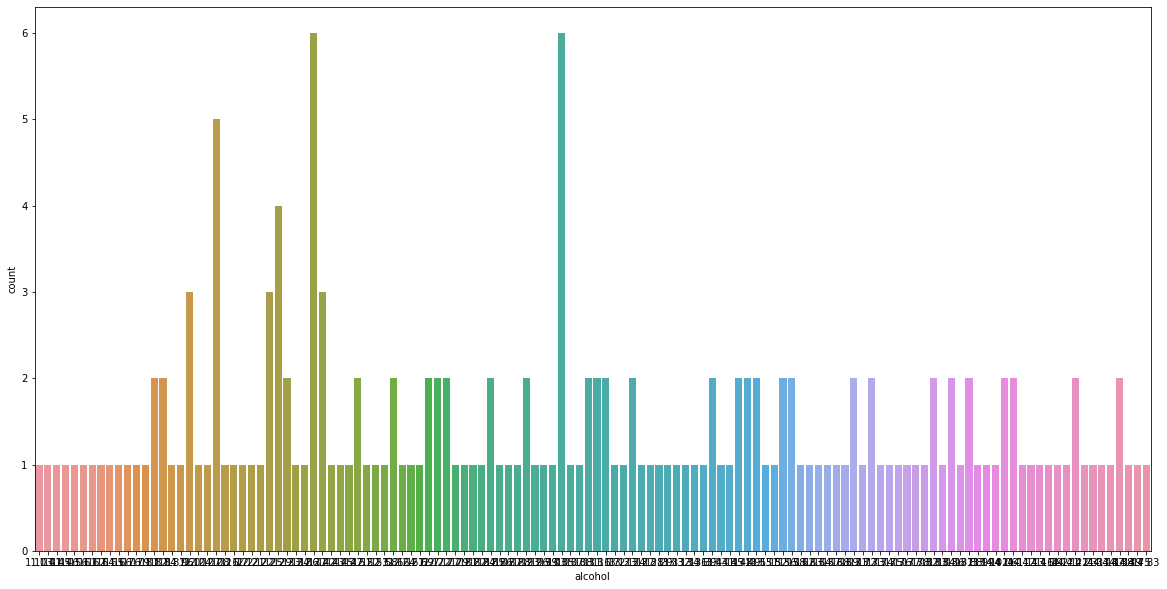

In [27]:
# Hint: sns.countplot
matplotlib.pyplot.subplots(figsize=(20,10))
ax = sns.countplot(x = "alcohol", data = X) #?????????????/

### Plot all pairwise correlations between features

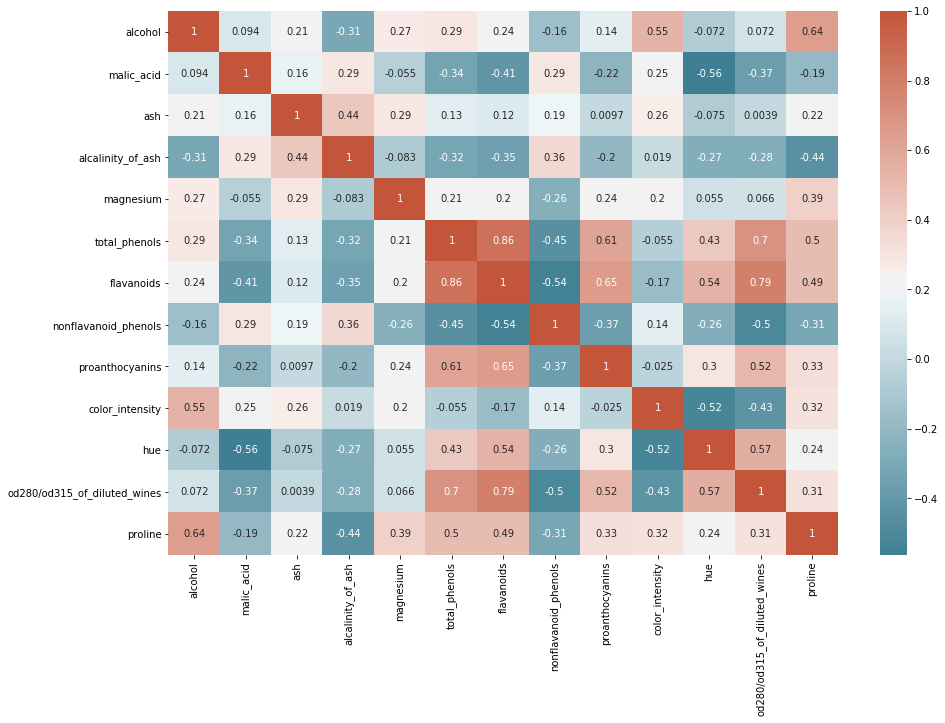

In [18]:
# Hint: sns.heatmap with annot = True and good looking colormap
matplotlib.pyplot.subplots(figsize=(15,10))

corr = X.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, 
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

### Which feature has the strongest linear dependency with the target? (by correlation)

### Plot scatterplots between target and every feature on one figure

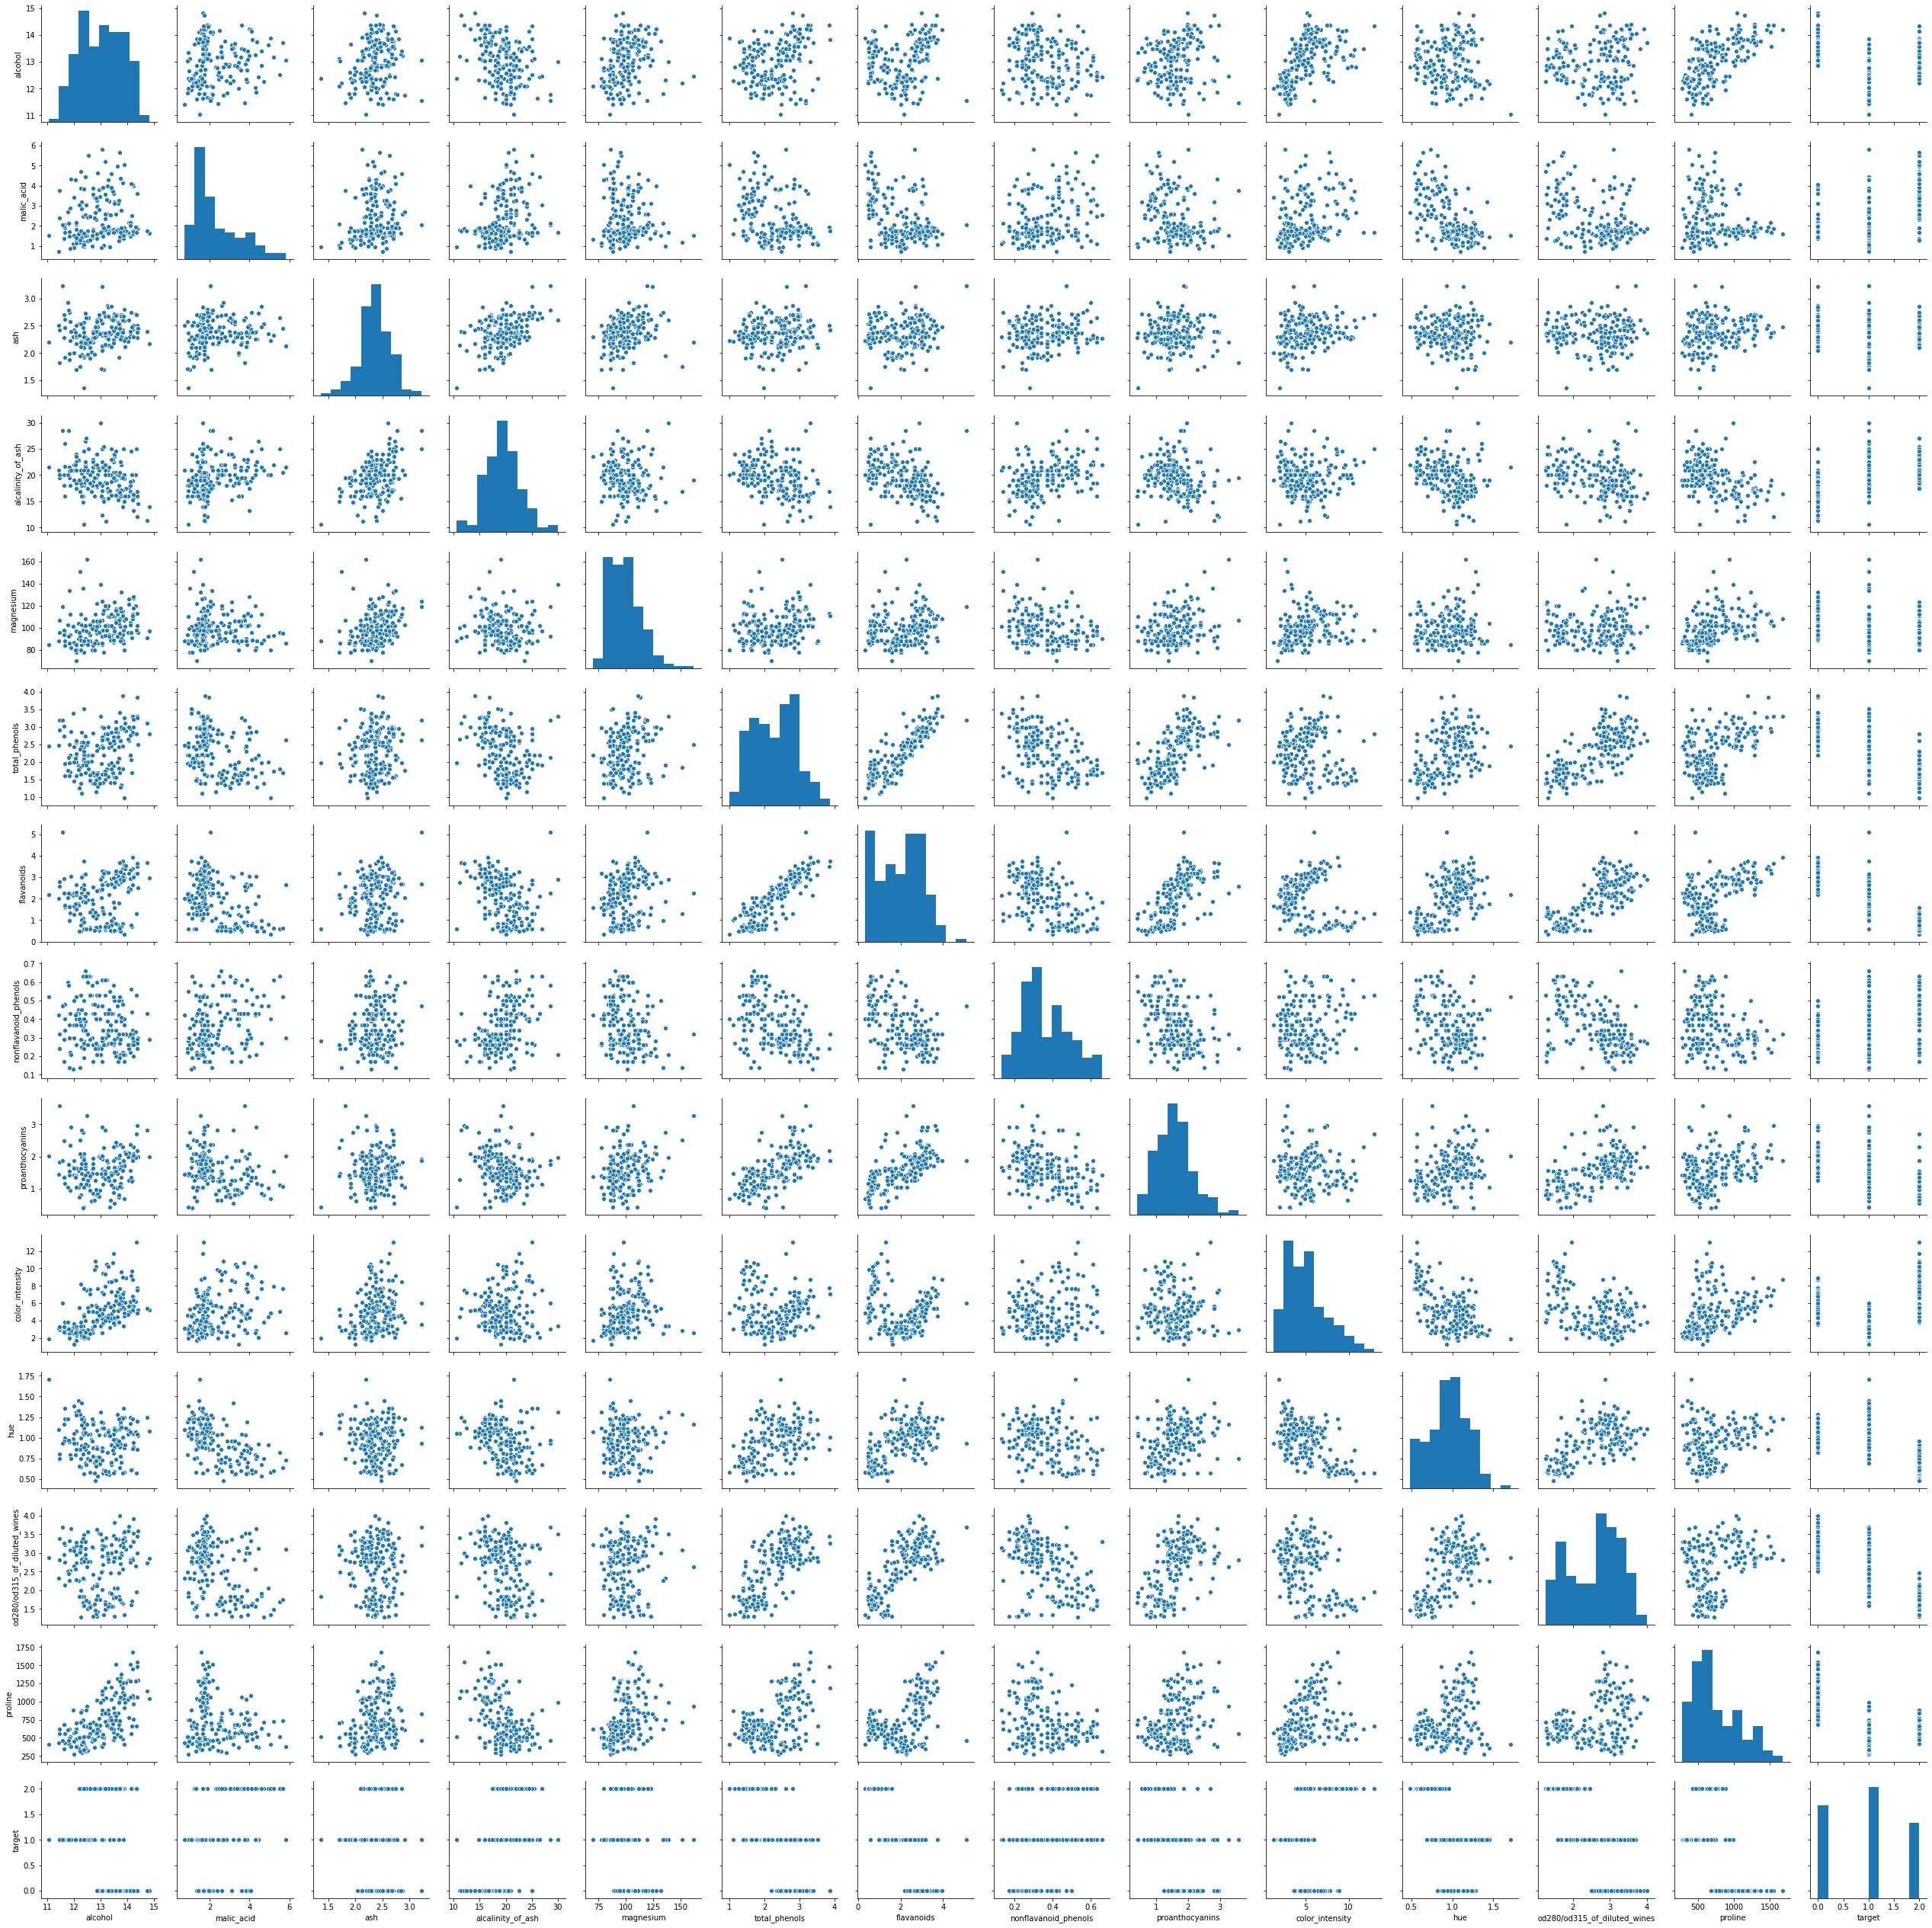

In [35]:
# Hint: sns.pairplot
sns.pairplot(Z)

### Plot scatterplot 'alcohol' vs. 'flavanoids'

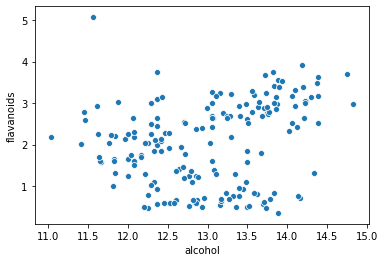

In [36]:
# Hint: sns.scatterplot with classes visualized by hue parameter
sns.scatterplot(X["alcohol"], X["flavanoids"])

### Plot how average malic_acid depends on class with standard errors

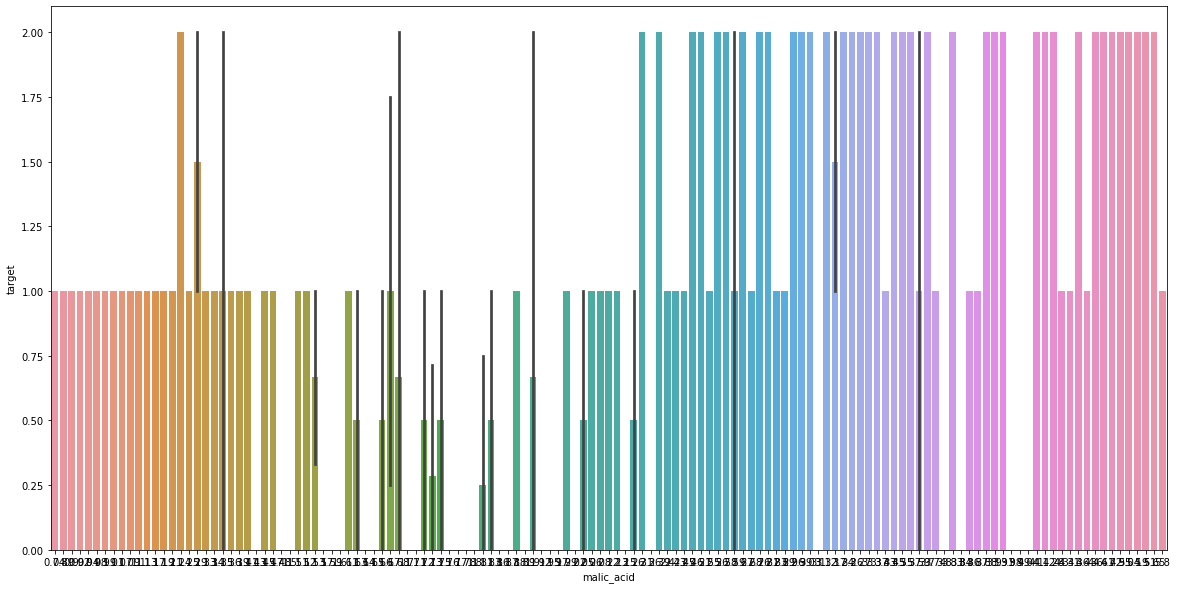

In [38]:
# Hint: sns.barplot
matplotlib.pyplot.subplots(figsize=(20,10))
sns.barplot(X["malic_acid"], Y)

### Plot aggregated dependency of proline as function of alcohol

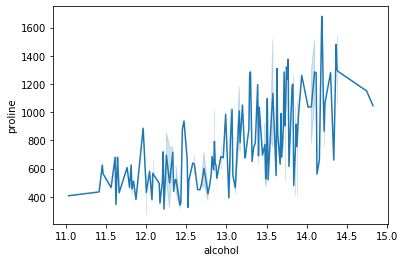

In [39]:
# Hint: sns.lineplot
sns.lineplot(X["alcohol"], X["proline"])

### Fit logistic regression for two features: 'alcohol' and 'flavanoids'

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [42]:
features = ['alcohol','flavanoids']
X2 = X[features]

In [44]:
X2.head(10)

,alcohol,flavanoids
0,14.23,3.06
1,13.20,2.76
2,13.16,3.24
3,14.37,3.49
4,13.24,2.69
5,14.20,3.39
6,14.39,2.52
7,14.06,2.51
8,14.83,2.98
9,13.86,3.15


In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X2,Y,random_state = 0,test_size = 0.3)

In [46]:
len(X_train), len(X_test)

(124, 54)

In [49]:
clf = sklearn.linear_model.LogisticRegression(random_state = 0)
clf.fit(X_train, Y_train)

LogisticRegression(random_state=0)

### Report accuracy on test set

In [51]:
print("Train accuracy:", clf.score(X_train, Y_train))
print("Test accuracy:", clf.score(X_test, Y_test))

Train accuracy: 0.9274193548387096
Test accuracy: 0.9074074074074074


### Plot decision boundaries in feature space together with test objects

In [54]:
!pip install mlxtend

     |████████████████████████████████| 1.3 MB 425 kB/s eta 0:00:01
You should consider upgrading via the '/home/nikita/environments/1env/bin/python3 -m pip install --upgrade pip' command.


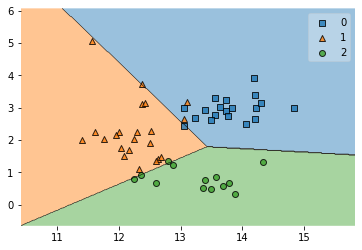

In [57]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(np.array(X_test), np.array(Y_test), clf = clf)

### Models comparison task: Calculate cross-validation accuracies for SGDClassifier on all data for different loss functions:
Compare 'hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron' losses.
Consider all available features.
Use kfold = KFold(n_splits=4, shuffle=True, random_state=0)

In [60]:
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits = 4, shuffle = True, random_state = 0)

In [61]:
def compare_cv_results(model_names, results):
    # compare algorithms
    fig = pyplot.figure(figsize=[10,5])
    fig.suptitle('Algorithm accuracies comparison')
    ax = fig.add_subplot(111)
    pyplot.boxplot(results)
    ax.set_xticklabels(names)
    pyplot.show()

In [62]:
compare_cv_results(clf, )

NameError: name 'model_names' is not defined

### Scaled models comparison: Do models comparison task with feature scaling (mean=0, std=1)

In [66]:
from sklearn.pipeline import Pipeline

### Do scaled models comparison with one-versus-rest scheme

In [70]:
from sklearn.multiclass import OneVsRestClassifier

### Do scaled models comparison with error correcting codes
Use code_size=15 and random_state=0

In [74]:
from sklearn.multiclass import OutputCodeClassifier